In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

from sklearn.tree import export_graphviz
#export_graphviz function genartes a GraphViz reperesebtation of decision tree

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
bank = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\DecisionTree\bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#Check if the data contains any null values - Nothing found!
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


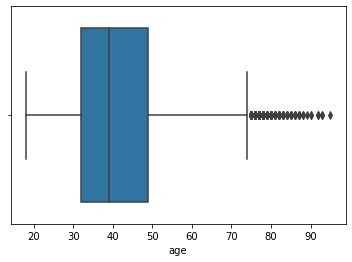

In [5]:
#Boxplot for 'age'
g = sns.boxplot(x=bank["age"])

C:\Users\ashraf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


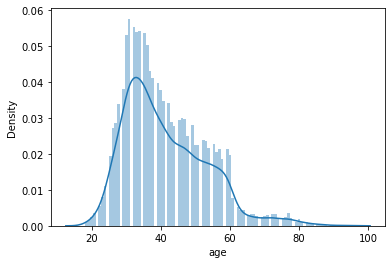

In [9]:
#Distribution of Age
sns.distplot(bank.age, bins=100)
plt.show()

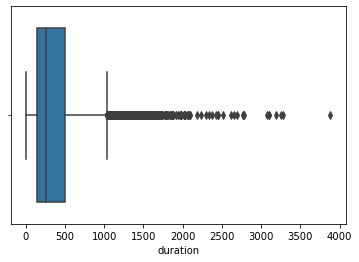

In [7]:
#Boxplot for 'duration'
g = sns.boxplot(x=bank["duration"])

C:\Users\ashraf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


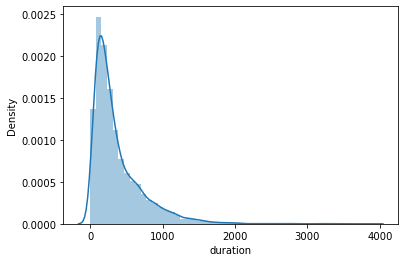

In [10]:
sns.distplot(bank.duration)
plt.show()

In [11]:
#Make a copy for parsing
bank_data = bank.copy()

In [13]:
#Explore People who made a deposit Vs Job category
jobs = ['management', 'blue-collar', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur', 'housemaid', 'unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job == j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34
